In [2]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify

In [3]:
I = lambda_1 = sp.Matrix([
        [1,0,0],
        [0,1,0],
        [0,0,1]
    ])
lambda_1 = sp.Matrix([
        [0,1,0],
        [1,0,0],
        [0,0,0]
    ])
lambda_2 = sp.Matrix([
        [0,-1j,0],
        [1j,0,0],
        [0,0,0]
    ])
lambda_3 = sp.Matrix([
        [1,0,0],
        [0,-1,0],
        [0,0,0]
    ])
lambda_4 = sp.Matrix([
        [0,0,1],
        [0,0,0],
        [1,0,0]
    ])
lambda_5 = sp.Matrix([
        [0,0,-1j],
        [0,0,0],
        [1j,0,0]
    ])
lambda_6 = sp.Matrix([
        [0,0,0],
        [0,0,1],
        [0,1,0]
    ])
lambda_7 = sp.Matrix([
        [0,0,0],
        [0,0,-1j],
        [0,1j,0]
    ])
lambda_8 = (1/sp.sqrt(3))*sp.Matrix([
        [1,0,0],
        [0,1,0],
        [0,0,-2]
    ])
m_1 = sp.Symbol("m_1")
m_2 = sp.Symbol("m_2")
m_3 = sp.Symbol("m_3")
m_4 = sp.Symbol("m_4")
m_5 = sp.Symbol("m_5")
m_6 = sp.Symbol("m_6")
m_7 = sp.Symbol("m_7")
m_8 = sp.Symbol("m_8")

In [4]:
rho = (1/3)*(I+sp.sqrt(3)*(m_1*lambda_1+m_2*lambda_2+m_3*lambda_3+m_4*lambda_4+m_5*lambda_5+m_6*lambda_6+m_7*lambda_7+m_8*lambda_8))

In [73]:
import matplotlib.pyplot as plt
class m_vectors:
    def __init__(self,RHO_EVOL):
        self.RHO_EVOL = RHO_EVOL
        self.gen_rho_el()
        self.m_l = self.gen_m()
    def gen_rho_el(self):
        self.rho_l =[
            [],
            [],
            [],
            [],
            [],
            [],
            [],
            [],
            [],
        ]
        for mat in self.RHO_EVOL:
            self.rho_l[0].append(complex(mat[0][0]))
            self.rho_l[1].append(complex(mat[0][1]))
            self.rho_l[2].append(complex(mat[0][2]))
            self.rho_l[3].append(complex(mat[1][0]))
            self.rho_l[4].append(complex(mat[1][1]))
            self.rho_l[5].append(complex(mat[1][2]))
            self.rho_l[6].append(complex(mat[2][0]))
            self.rho_l[7].append(complex(mat[2][1]))
            self.rho_l[8].append(complex(mat[2][2]))
        self.rho_l = [np.array(el) for el in self.rho_l]
    def gen_m(self):
        arr = []
        arr.append(np.sqrt(3)*np.real(self.rho_l[1]))
        arr.append(np.sqrt(3)*np.imag(self.rho_l[1]))
        arr.append((np.sqrt(3)/(2))*np.real(self.rho_l[0]-self.rho_l[4]))
        arr.append(np.sqrt(3)*np.real(self.rho_l[2]))
        arr.append(np.sqrt(3)*np.imag(self.rho_l[2]))
        arr.append(np.sqrt(3)*np.real(self.rho_l[5]))
        arr.append(np.sqrt(3)*np.imag(self.rho_l[5]))
        arr.append((1/2)*(1-3*np.real(self.rho_l[8])))
        return arr

In [82]:
class plotting_m:
    def __init__(self,m_l):
        self.m_l = m_l

    def circle(self):
        theta = np.linspace(0,2*np.pi,100)
        x= np.cos(theta)
        y= np.sin(theta)
        plt.plot(x,y) # outer boundary
        plt.plot((1/2)*x,(1/2)*y) # inner boundary
        plt.plot((1/np.sqrt(3))*x,(1/np.sqrt(3))*y) # middle boundary

    def plot_cartan(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[2],self.m_l[7],'o')
        plt.plot([-np.sqrt(3)/2,np.sqrt(3)/2],[1/2,1/2],'b')
        plt.plot([0,-np.sqrt(3)/2],[-1,1/2],'b')
        plt.plot([0,np.sqrt(3)/2],[-1,1/2],'b')
        
        
        self.circle()
        
        plt.text(np.sqrt(3)/2+0.01, 1/2, 'state C', fontsize=12)
        plt.text(-np.sqrt(3)/2-0.14, 1/2, 'state B', fontsize=12)
        plt.text(-0.045, -1-0.1, 'state A', fontsize=12)
        D = 0.5 #the displacement size of the plot
        plt.axis([-1/2-D, 1/2+D, -1.2-D, 2/3+D])
        plt.xlabel("m_3",fontsize=16)
        plt.ylabel("m_8",fontsize=16)
        plt.title("Evolution of a 3-level quantum system",fontsize=16)
        plt.show()
    def plot_1_2(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[0],self.m_l[1],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_4_5(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[3],self.m_l[4],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_6_7(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[5],self.m_l[6],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_1_8(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[0],self.m_l[7],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_3_4(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[2],self.m_l[3],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_4_8(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[3],self.m_l[7],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()

2617


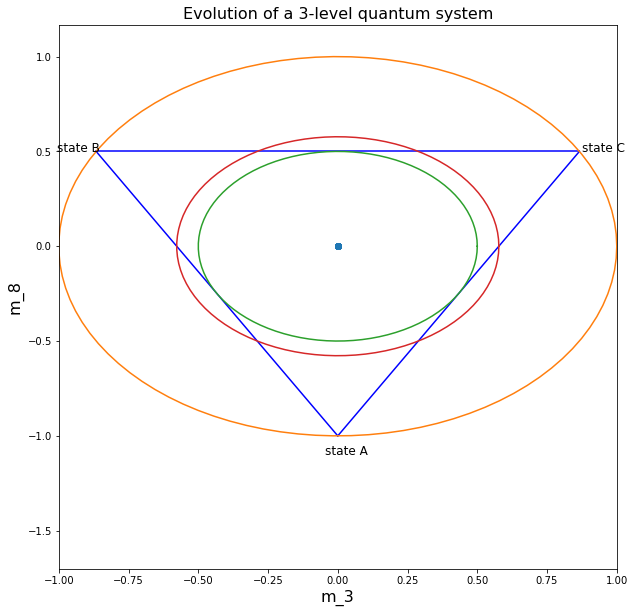

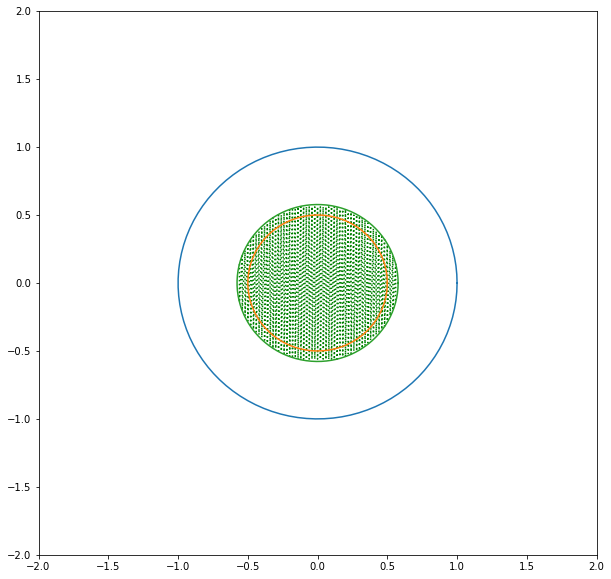

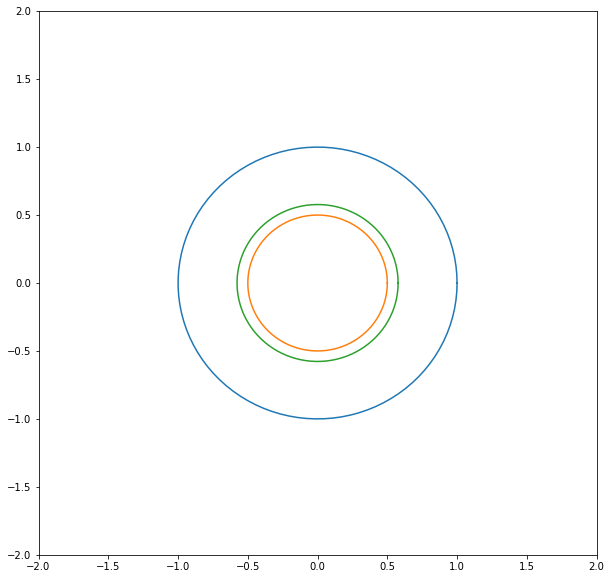

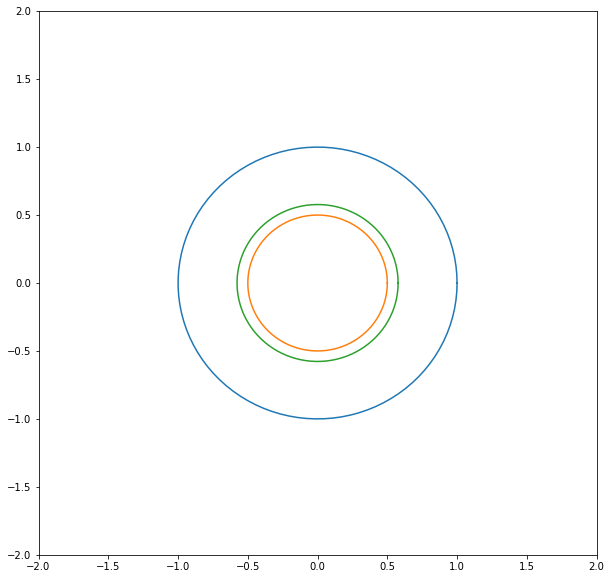

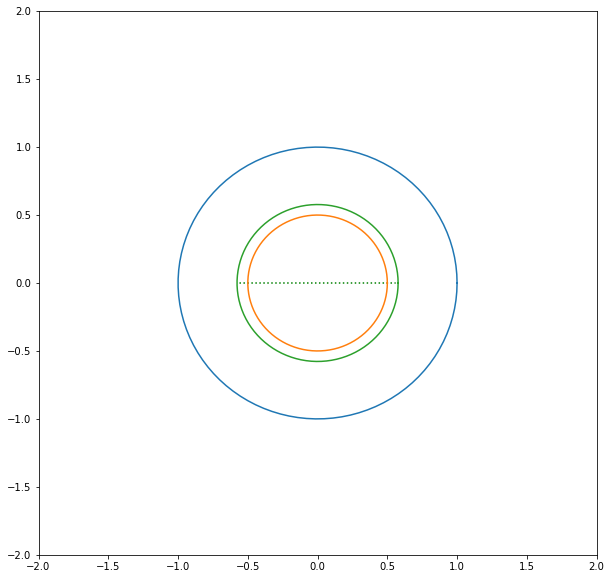

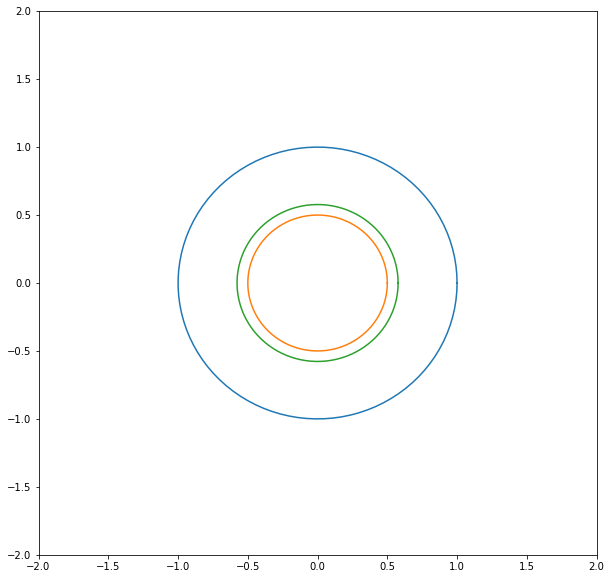

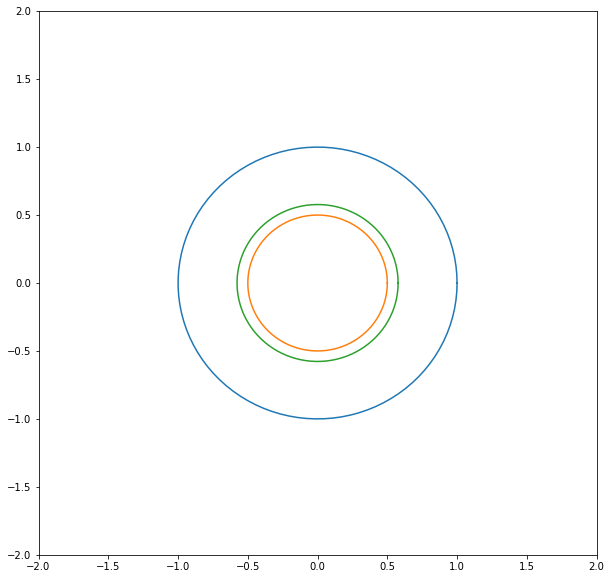

In [83]:
RHO = lambdify([[m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8]],rho)
RHO_l =[]
N=100
for i in range(N):
    for j in range(N):
        m3 = (2*i)/N - 1
        m8 = (2*j)/N - 1
        rn = np.array([m3,m8,0,0,0,0,0,0])
        RHO_ = RHO(rn)
        w,v= np.linalg.eig(RHO_)
        eig = np.real(w)
        pos_elements = eig>=0
        if np.all(pos_elements):   
            RHO_l.append(RHO_)
print(len(RHO_l))
m_inst = m_vectors(RHO_l)
m = plotting_m(m_inst.m_l)
m.plot_cartan()
m.plot_1_2()
m.plot_4_5()
m.plot_6_7()
m.plot_1_8()
m.plot_3_4()
m.plot_4_8()

In [ ]:
"""RHO = lambdify([[m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8]],rho)

#rn = np.random.rand(8)*2-1
rn = np.array([0.5,0,0,0,0,0,0,0]) #0.5775
RHO_ = RHO(rn)
w,v= np.linalg.eig(RHO_)
eig = np.real(w)
print(eig)
pos_elements = eig>=0
np.all(pos_elements)


m_inst = m_vectors([RHO_])
m = plotting_m(m_inst.m_l)
m.plot_cartan()
m.plot_1_2()
m.plot_4_5()
m.plot_6_7()"""